In [ ]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>")) # Fuerza a la libreta a ocupar toda la pantalla
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Modifica el tamaño de la fuente de la libreta

import warnings
warnings.filterwarnings('ignore') # Los warnings no aparecen en la libreta

# **0. Importar librerías**

In [ ]:
!pip install ydata-profiling

In [ ]:
# importar librerías
import numpy as np
import pandas as pd
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score, recall_score, precision_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp

%matplotlib inline

# **1. Carga de datos**

Llamamos `telco` al dataframe

In [ ]:
#Cargamos el dataset
dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",sep=',')
# Lo guardamos en un dataframe
telco = pd.DataFrame(dataframe)

Comprobamos que se ha cargado correctamente

In [ ]:
telco


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Visualizamos la proporción de clases de la variable objetivo `Churn`

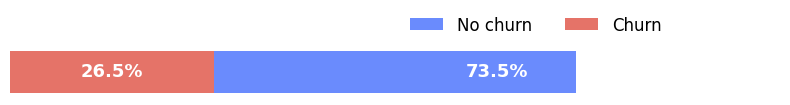

In [ ]:
import matplotlib.pyplot as plt

# Supón que tu variable 'Churn' tiene valores "Yes" y "No"
counts = telco['Churn'].value_counts(normalize=True) * 100
churn_yes = counts.get('Yes', 0)
churn_no = counts.get('No', 0)

fig, ax = plt.subplots(figsize=(8, 1.5))

# Colores (puedes cambiarlos)
colors = ['#e57368', '#6a8bfd']  # rojo y azul

# Barra horizontal
ax.barh(0, churn_no, color=colors[1], label='No churn')
ax.barh(0, churn_yes, color=colors[0], label='Churn')

# Porcentajes dentro de cada color
ax.text(churn_yes / 2, 0, f"{churn_yes:.1f}%", va='center', ha='center',
        color='white', fontsize=13, fontweight='bold')
ax.text(churn_yes + churn_no / 2, 0, f"{churn_no:.1f}%", va='center', ha='center',
        color='white', fontsize=13, fontweight='bold')

ax.set_xlim(0, 100)
ax.set_yticks([])
ax.set_xticks([])
ax.spines[['top','bottom','left','right']].set_visible(False)

ax.legend(loc='center left', bbox_to_anchor=(0.5, 1.5), ncol=2, frameon=False, fontsize=12)

plt.tight_layout()
plt.show()

# **2. Primera vista de los datos**

## Visualizamos los datos

Hacemos un data profiling para tener una idea de los datos que hay que modificar o eliminar para que el modelo funcione correctamente

In [ ]:
pp.ProfileReport(telco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 14.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

No tenemos valores nulos como podemos observar

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **3. Limpiamos los datos**

## CustomerID

Esta variable no aporta información a lo que queremos predecir por lo que la eliminamos

In [ ]:
telco.drop(['customerID'], axis=1, inplace=True)

Quitamos valores duplicados

In [ ]:
telco.drop_duplicates(inplace=True)

## Pasamos Yes/No a 1/0

Los programas no entienden de palabras, necesitamos números.

Por ello, pasamos todos los valores de `Yes` a 1 y todos los valores de `No` a 0

In [ ]:
telco['Partner'] = np.where(telco['Partner'] == 'Yes', 1, 0)
telco['Dependents'] = np.where(telco['Dependents'] == 'Yes', 1, 0)
telco['PhoneService'] = np.where(telco['PhoneService'] == 'Yes', 1, 0)
telco['PaperlessBilling'] = np.where(telco['PaperlessBilling'] == 'Yes', 1, 0)
telco['Churn'] = np.where(telco['Churn'] == 'Yes', 1, 0)

# **4. Visualizamos los datos**

## 4.1 Variables Continuas

### 4.1.1 TotalCharges

In [ ]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [ ]:
telco.dropna(inplace=True)

In [ ]:
telco = telco[telco['TotalCharges']<=7400]

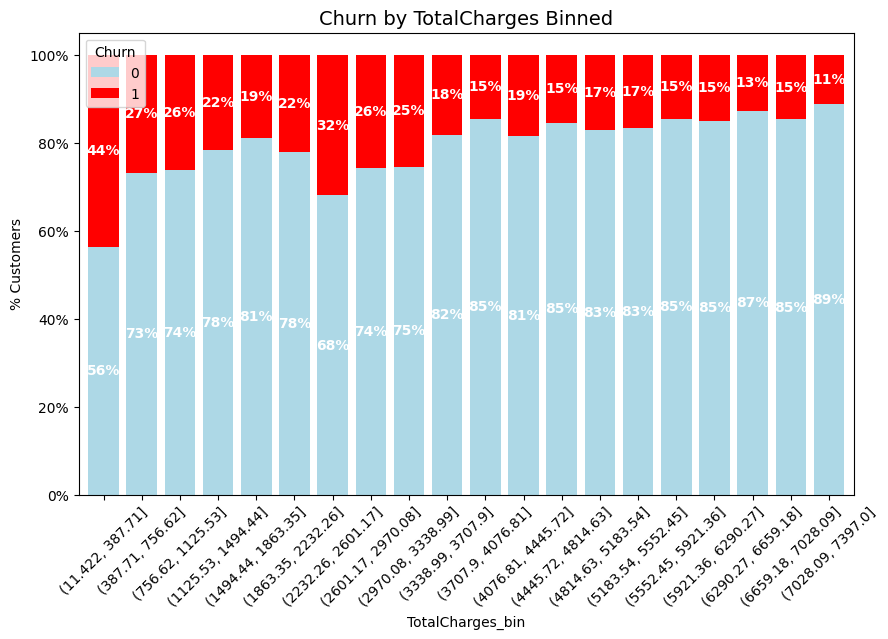

In [ ]:
import matplotlib.ticker as mtick

# Crear 10 bins para TotalCharges
telco['TotalCharges_bin'] = pd.cut(telco['TotalCharges'], bins=20)

colors = ['lightblue','red']
seniority_churn = telco.groupby(['TotalCharges_bin','Churn']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                  width=0.8,
                                                                  stacked=True,
                                                                  rot=45,
                                                                  figsize=(10,6),
                                                                  color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by TotalCharges Binned', size=14)

# Añadir etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # solo etiquetar si el segmento tiene altura
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%',
                    (x + width / 2, y + height / 2),
                    ha='center', va='center',
                    color='white', weight='bold', size=10)

### 4.1.2 Tenure

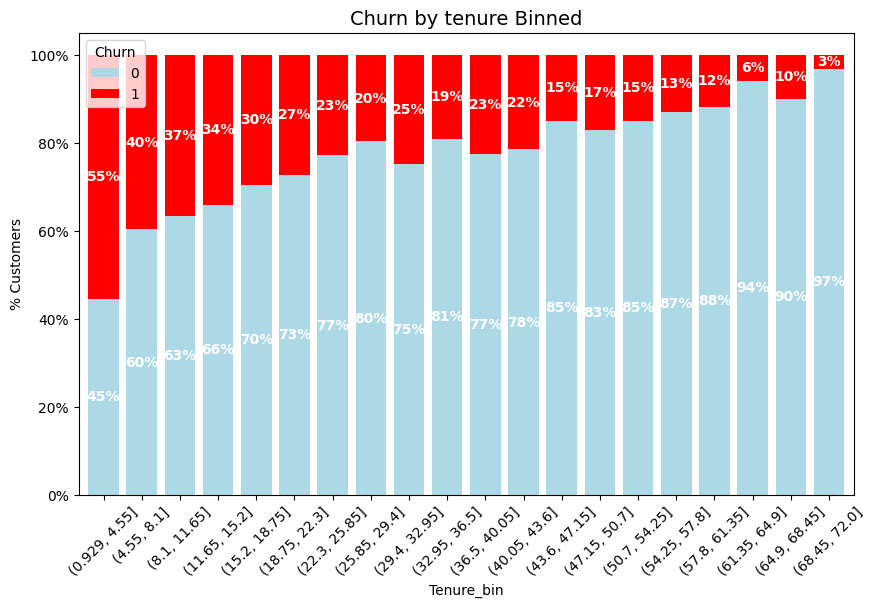

In [ ]:
import matplotlib.ticker as mtick

# Crear 10 bins para TotalCharges
telco['Tenure_bin'] = pd.cut(telco['tenure'], bins=20)

colors = ['lightblue','red']
seniority_churn = telco.groupby(['Tenure_bin','Churn']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                  width=0.8,
                                                                  stacked=True,
                                                                  rot=45,
                                                                  figsize=(10,6),
                                                                  color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by tenure Binned', size=14)

# Añadir etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # solo etiquetar si el segmento tiene altura
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%',
                    (x + width / 2, y + height / 2),
                    ha='center', va='center',
                    color='white', weight='bold', size=10)

### 4.1.3 Monthly Charges

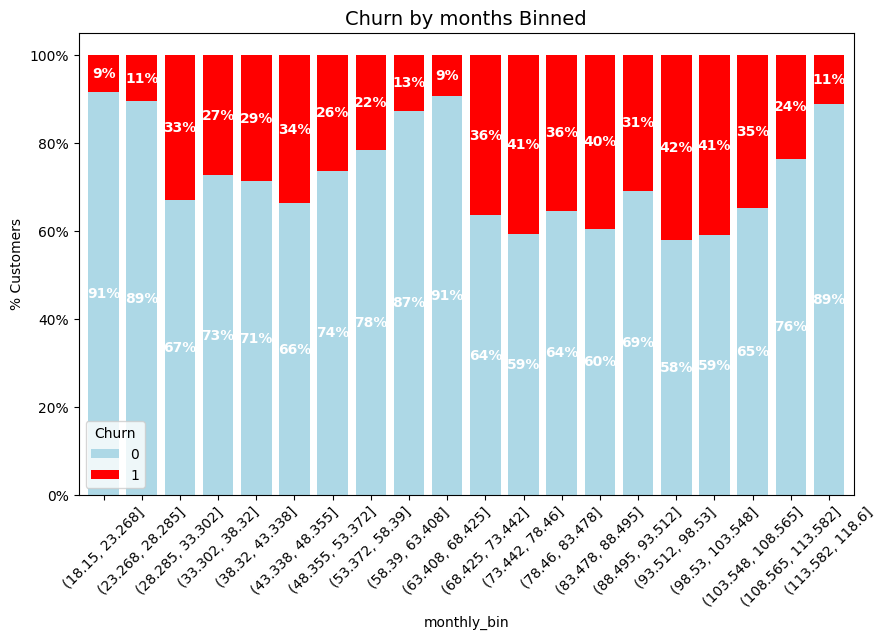

In [ ]:
import matplotlib.ticker as mtick

# Crear 10 bins para TotalCharges
telco['monthly_bin'] = pd.cut(telco['MonthlyCharges'], bins=20)

colors = ['lightblue','red']
seniority_churn = telco.groupby(['monthly_bin','Churn']).size().unstack()

ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                  width=0.8,
                                                                  stacked=True,
                                                                  rot=45,
                                                                  figsize=(10,6),
                                                                  color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by months Binned', size=14)

# Añadir etiquetas
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # solo etiquetar si el segmento tiene altura
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%',
                    (x + width / 2, y + height / 2),
                    ha='center', va='center',
                    color='white', weight='bold', size=10)

## 4.2 Variables Yes/No

### 4.2.1 Paperless Billing

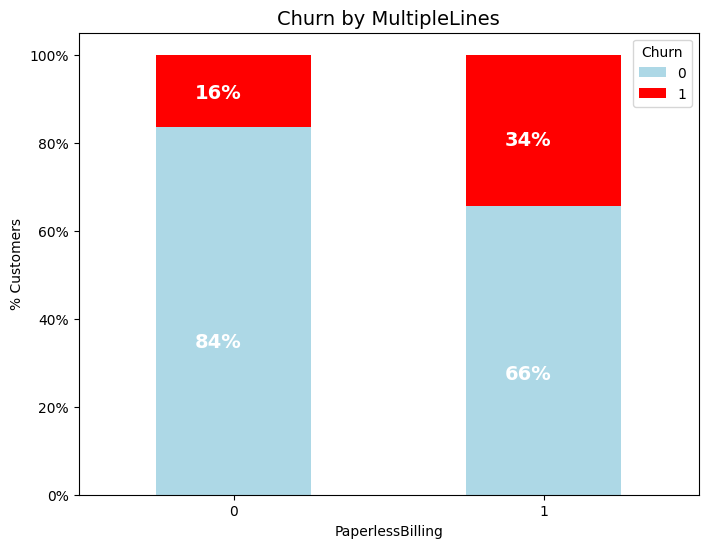

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['PaperlessBilling','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 4.2.2 Dependents

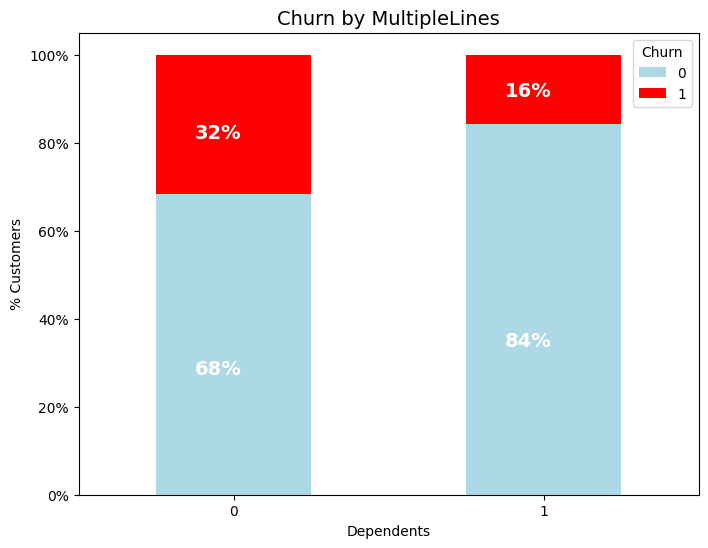

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['Dependents','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 4.2.3 Partner

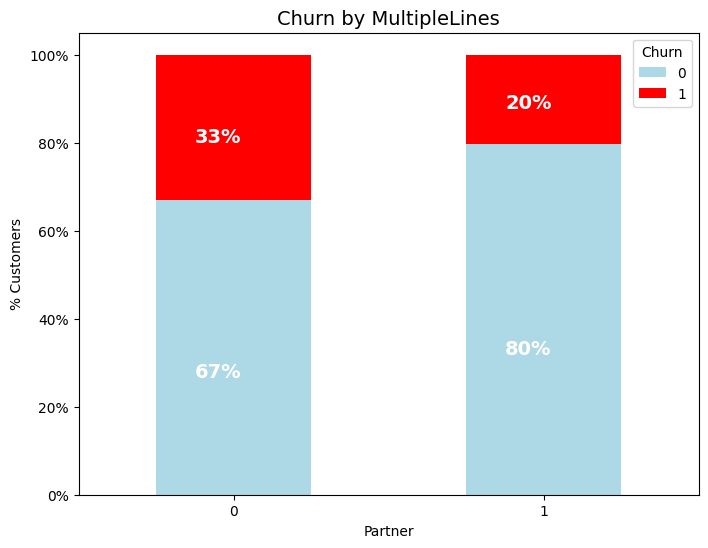

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['Partner','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 4.2.4 Male

Estos programas no entienden palabras con lo cual pasamos la variable Gender (que es Male o Female) por Male (que devuelve 1 si es hombre, 0 si es mujer)

In [ ]:
telco['male'] = np.where(telco['gender'] == 'Male', 1, 0)

telco.drop(['gender'], axis=1, inplace=True)

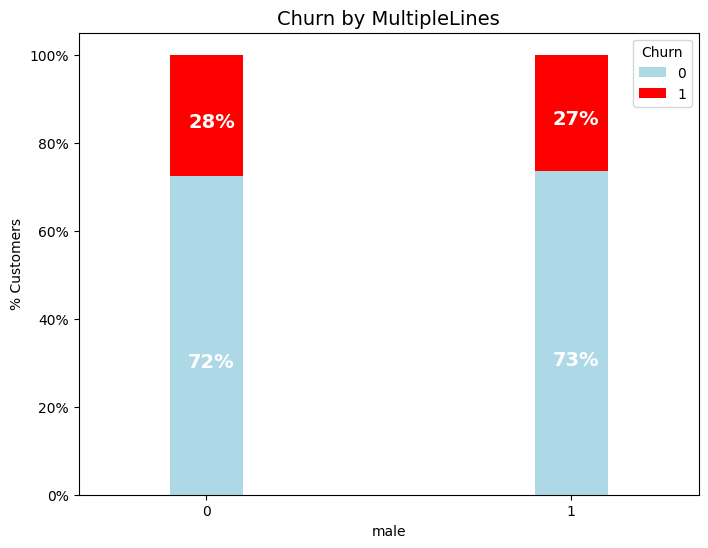

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['male','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Solo aporta ruido

In [ ]:
telco.drop(['male'], axis=1, inplace=True)

### 4.2.5 Senior Citizen

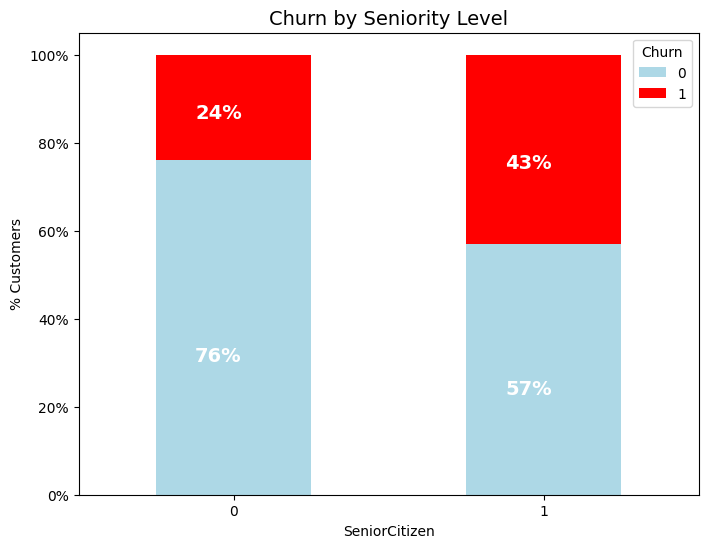

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 4.2.6 Family Members

In [ ]:
telco['FamilyMembers']= telco['Dependents'] + telco['Partner']

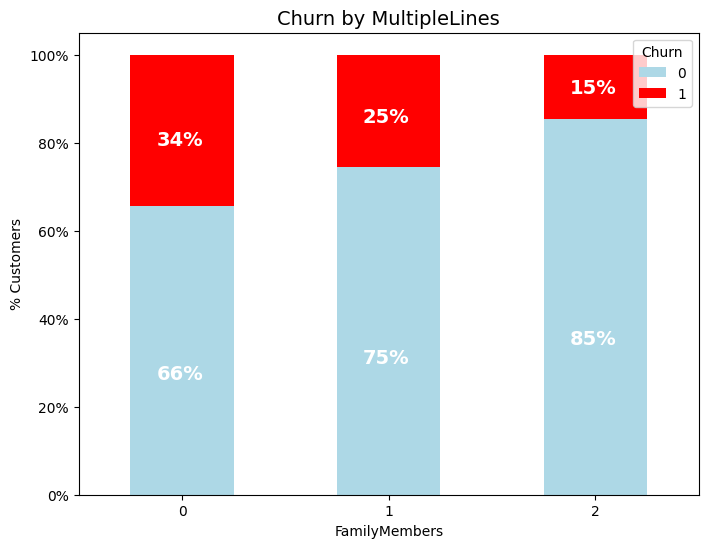

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['FamilyMembers','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
telco['categ'] = telco['SeniorCitizen'] + telco['PaperlessBilling'] + (1-telco['Partner']) + (1-telco['Dependents'])

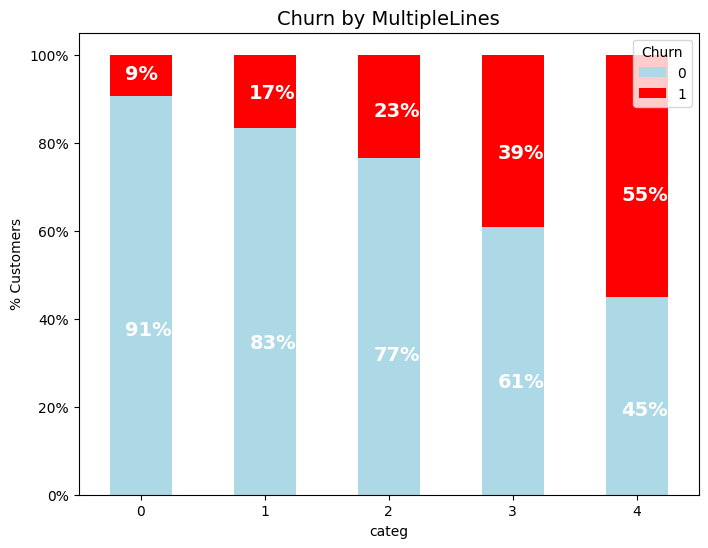

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['categ','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

## 4.3 Variables Yes/No/No Internet

### 4.3.1 Visualización de este tipo de datos

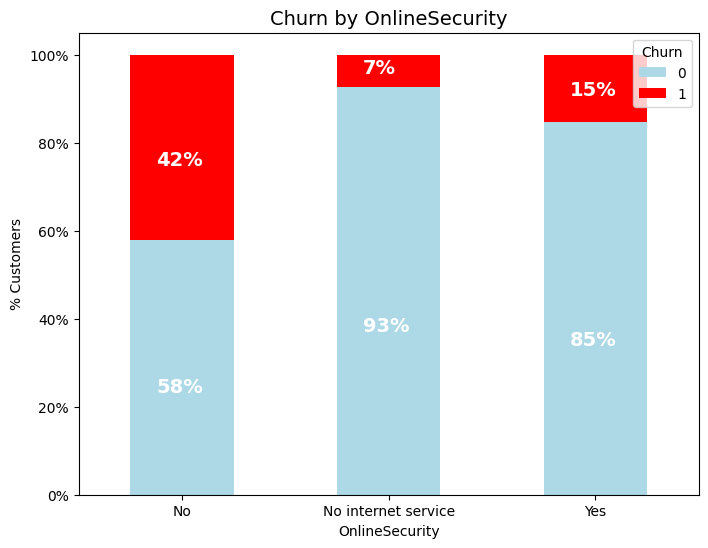

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['OnlineSecurity','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by OnlineSecurity',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

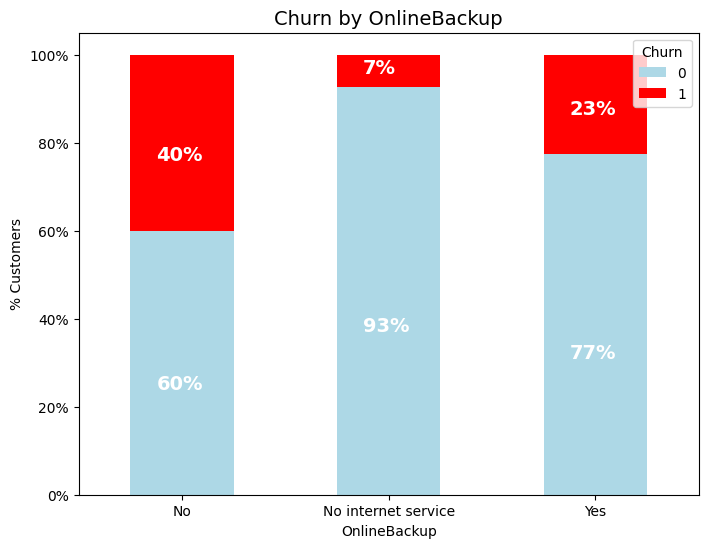

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['OnlineBackup','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by OnlineBackup',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

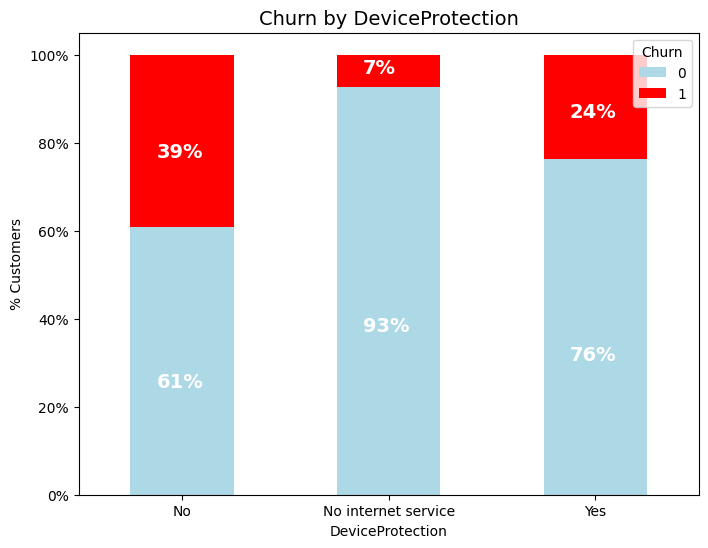

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['DeviceProtection','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by DeviceProtection',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

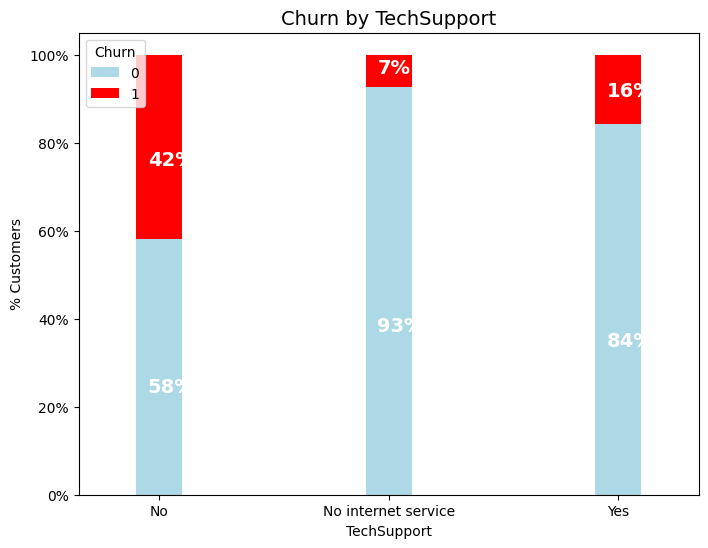

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['TechSupport','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by TechSupport',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

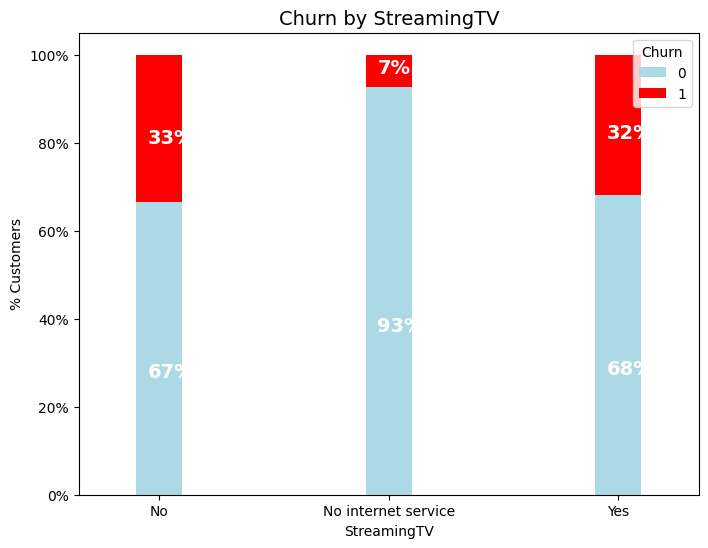

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['StreamingTV','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by StreamingTV',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

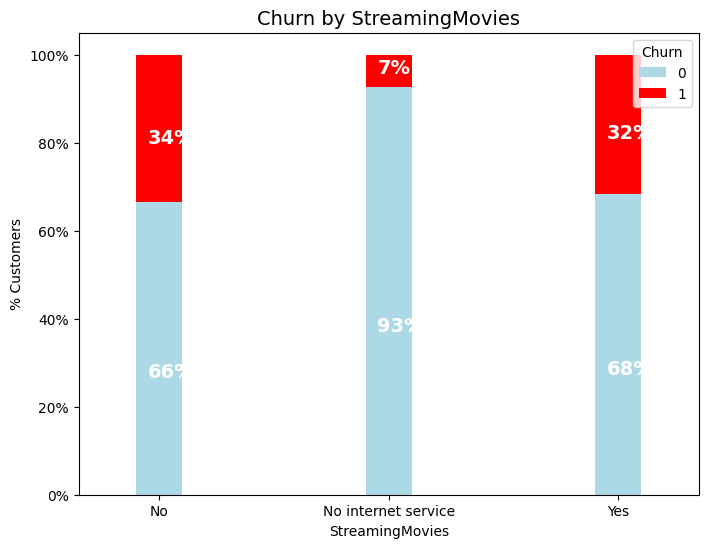

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['StreamingMovies','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by StreamingMovies',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### 4.3.2 No Internet

In [ ]:
telco['NoInternet'] = np.where(telco['DeviceProtection'] == 'No internet service', 1, 0)

### 4.3.3 Pasar a 0-1

In [ ]:
telco['OnlineSecurity'] = np.where(telco['OnlineSecurity'] == 'Yes', 1, 0)
telco['OnlineBackup'] = np.where(telco['OnlineBackup'] == 'Yes', 1, 0)
telco['DeviceProtection'] = np.where(telco['DeviceProtection'] == 'Yes', 1, 0)
telco['TechSupport'] = np.where(telco['TechSupport'] == 'Yes', 1, 0)
telco['StreamingTV'] = np.where(telco['StreamingTV'] == 'Yes', 1, 0)
telco['StreamingMovies'] = np.where(telco['StreamingMovies'] == 'Yes', 1, 0)

### 4.3.4 Extras

In [ ]:
telco['Extras'] = telco['OnlineSecurity'] + telco['OnlineBackup'] + telco['DeviceProtection'] + telco['TechSupport']

In [ ]:
telco.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],axis=1,inplace=True)

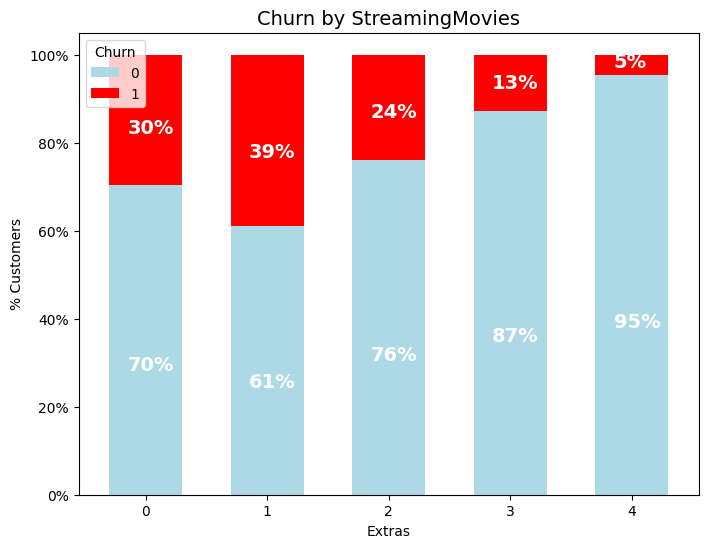

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['Extras','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.6,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by StreamingMovies',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

## 4.4 Otras variables

### 4.4.1 Multiple lines

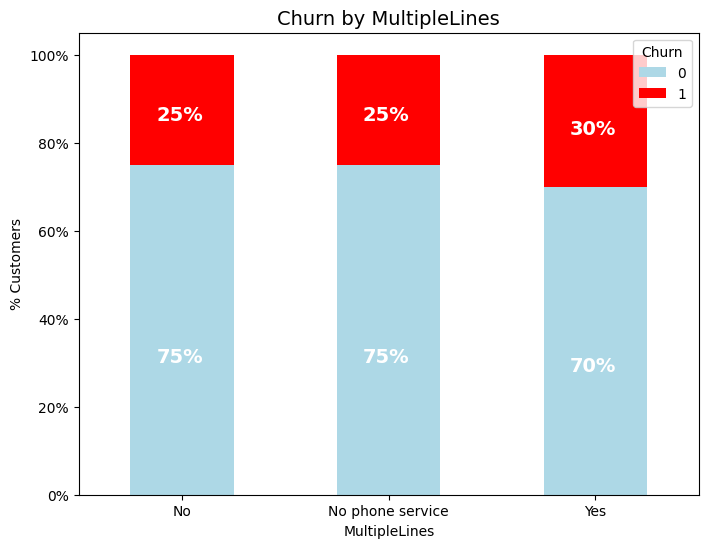

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['MultipleLines','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Aporta ruido y por ende Phone Service también

In [ ]:
telco.drop(['MultipleLines','PhoneService'], axis=1, inplace=True)

### 4.4.2 Contract

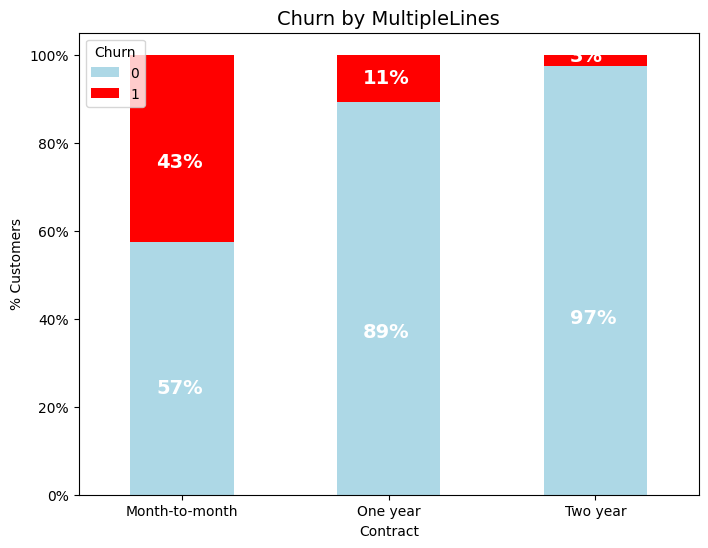

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['Contract','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
telco['ContractMtM'] = np.where(telco['Contract'] == 'Month-to-month', 1, 0)
telco['Contract2year'] = np.where(telco['Contract'] == 'Two year', 1, 0)

In [ ]:
telco.drop(['Contract'], axis=1, inplace=True)

### 4.4.3 InternetService

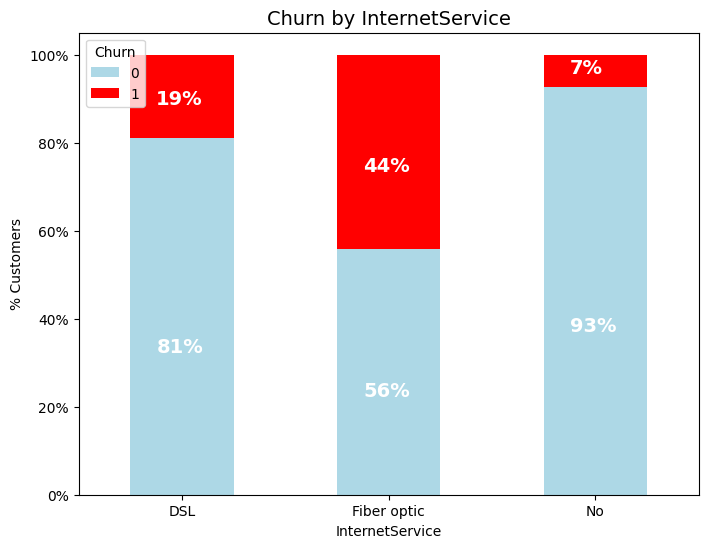

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['InternetService','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by InternetService',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
telco['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
telco['InternetServiceFiber'] = np.where(telco['InternetService'] == 'Fiber optic', 1, 0)

In [ ]:
telco.drop(['InternetService'], axis=1, inplace=True)

Internet Service DSL aporta ruido

### 4.4.4 Payment Method

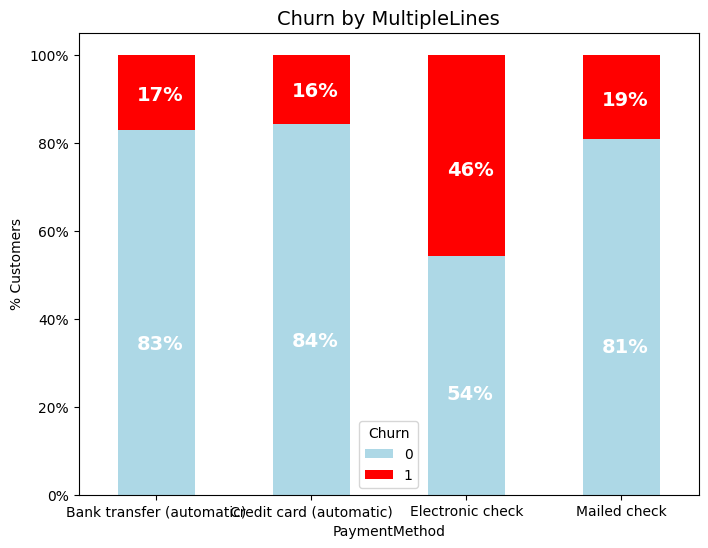

In [ ]:
import matplotlib.ticker as mtick

colors = ['lightblue','red']
seniority_churn = telco.groupby(['PaymentMethod','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_title('Churn by MultipleLines',size = 14)


# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [ ]:
telco['PaidElectronicCheck'] = np.where(telco['PaymentMethod'] == 'Electronic check', 1, 0)

In [ ]:
telco.drop(['PaymentMethod'], axis=1, inplace=True)

El resto de variales se comportan parecido -> las tratamos como iguales

## 4.5 Último repaso rápido a los datos

In [ ]:
telco.drop( ['TotalCharges_bin', 'monthly_bin', 'Tenure_bin'],axis=1, inplace=True)

In [ ]:
telco.drop(['Partner', 'Dependents', 'categ'], axis=1, inplace=True)

In [ ]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6796 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SeniorCitizen         6796 non-null   int64  
 1   tenure                6796 non-null   int64  
 2   PaperlessBilling      6796 non-null   int64  
 3   MonthlyCharges        6796 non-null   float64
 4   TotalCharges          6796 non-null   float64
 5   Churn                 6796 non-null   int64  
 6   FamilyMembers         6796 non-null   int64  
 7   NoInternet            6796 non-null   int64  
 8   Extras                6796 non-null   int64  
 9   ContractMtM           6796 non-null   int64  
 10  Contract2year         6796 non-null   int64  
 11  InternetServiceFiber  6796 non-null   int64  
 12  PaidElectronicCheck   6796 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 743.3 KB


In [ ]:
telco.shape

(6796, 13)

# **5. Separar en Train y Test**

Separamos en train y test el dataset entero. Dado que estandarizaremos en el pipeline, aquí no escalamos los datos.

Estratificamos para mantener la proporción de los valores de la variable objetivo. Si no hiciésemos esto podría ocurrir que solo cogieramos valores de Churn = 0 en el test sin necesariamente tener ninguno de Churn = 1.

In [ ]:
# Separar el dataset en dos subdatasets train y test y hacerlo replicable
train, test = train_test_split(telco, train_size = 0.7,stratify= telco["Churn"] ,random_state = 1234)

In [ ]:
y_train = train['Churn'].copy()
X_train = train.drop(['Churn'], axis=1).copy()
y_test = test['Churn'].copy()
X_test = test.drop(['Churn'], axis=1).copy()

# **6. Evalueción del algoritmo**

## 6.1 Random Forest


Distribución de la variable Churn:
Churn
0    0.729694
1    0.270306
Name: proportion, dtype: float64


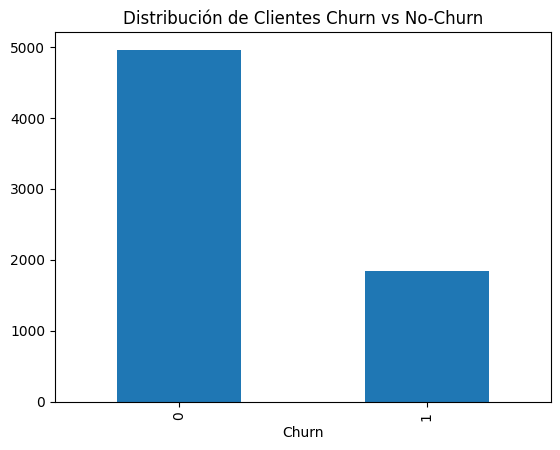

In [ ]:
# Tasa de Churn
print("\nDistribución de la variable Churn:")
print(telco['Churn'].value_counts(normalize=True))
telco['Churn'].value_counts().plot(kind='bar', title='Distribución de Clientes Churn vs No-Churn')
plt.show()

Podemos ver que `Churn` esta debalanceado.

In [ ]:
# Modelo Random Forest
rf = RandomForestClassifier(
    # Escogemos 1000 estimadores tras haber probado y comparado resultados.
    n_estimators=1000,
    # Acotamos la profundidad máxima de cada árbol ya que así evitamos riesgo de overfitting.
    max_depth=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    # Balanceamos la muestra porque Churn está muy desbalanceada
    class_weight='balanced_subsample'
)

# Pipeline con el escalado de datos y el random forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', rf)
])

# Entrenamiento
pipeline_rf.fit(X_train, y_train)

# Predicciones
y_train_pred = pipeline_rf.predict(X_train)
y_pred_proba = pipeline_rf.predict_proba(X_test)[:, 1]

Seleccionamos un umbral de 0.45 ya que nuestro objetivo es maximizar el Recall pero sin tampoco olvidarnos del resto de predicciones

In [ ]:
y_pred = (y_pred_proba >= 0.45).astype(int)

In [ ]:
y_train_pred = pipeline_rf.predict(X_train)

Hemos elegido como métrica F2 ya que otorga 4 veces más importancia al recall que a la precision. Nuestro objetivo es maximizar el recall ya que no queremos que el algoritmo nos "mienta" cuando un cliente quiera irse. De ser así la compañía perderá dinero

In [ ]:
print("f2 train: ",fbeta_score(y_train, y_train_pred, beta=2))
print("f2 test: ",fbeta_score(y_test, y_pred, beta=2))

f2 train:  0.7398534385569335
f2 test:  0.7424483306836248


Matriz de confusión en train

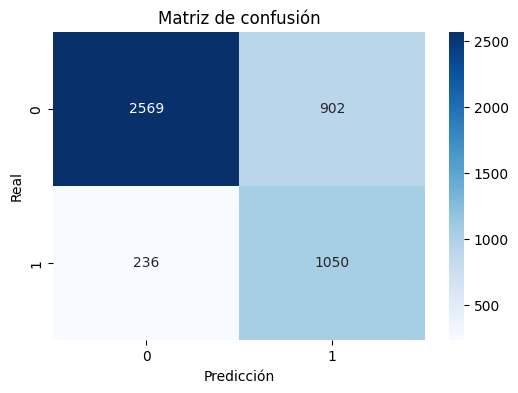

In [ ]:
# 2. Matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# 3. Visualizar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

Matriz de confusión en test

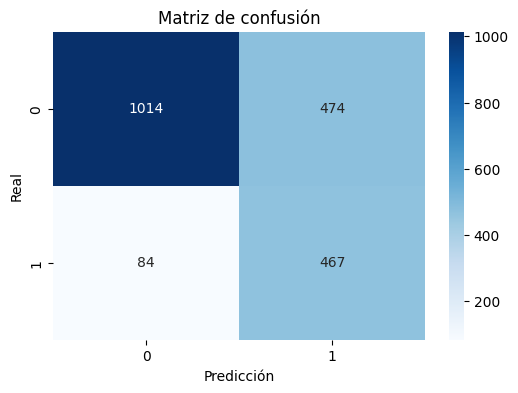

In [ ]:
# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 3. Visualizar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      3471
           1       0.54      0.82      0.65      1286

    accuracy                           0.76      4757
   macro avg       0.73      0.78      0.73      4757
weighted avg       0.81      0.76      0.77      4757



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1488
           1       0.50      0.85      0.63       551

    accuracy                           0.73      2039
   macro avg       0.71      0.76      0.71      2039
weighted avg       0.81      0.73      0.74      2039



### 6.1.3 Feature Engineering con Random Forest

Esto nos ha ayudado a determinar qué variables son las que debemos de eliminar.

Por ejemplo, habíamos creado una variable que se llamaba `categ` y lo que hacía era sumar las variables Partner, Dependents, PaperlessBilling y SeniorCitizen y pensábamos que iba a ser una variable determinante. Sin embargo, observamos que en el feature engineering le otorgaba el valor más bajo y empeoraba nuestra métrica. Por ello ya no la tenemos.

In [ ]:
random_f = rf.fit(X_train, y_train)
feauture_importances = pd.Series(
    data=random_f.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)


In [ ]:
print(feauture_importances)

ContractMtM             0.260044
tenure                  0.169359
InternetServiceFiber    0.130434
Contract2year           0.110709
TotalCharges            0.091282
MonthlyCharges          0.086719
PaidElectronicCheck     0.054059
NoInternet              0.045318
Extras                  0.025819
PaperlessBilling        0.013520
FamilyMembers           0.006847
SeniorCitizen           0.005889
dtype: float64


Text(0.5, 0, 'Importancia')

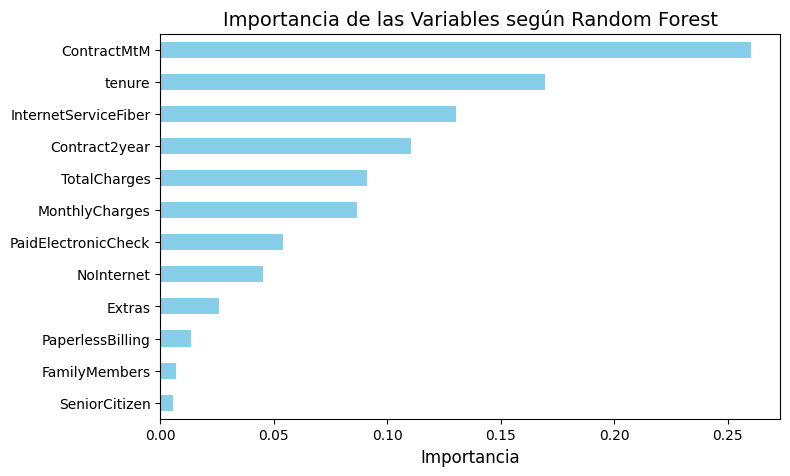

In [ ]:
# Gráfico de barras horizontales
plt.figure(figsize=(8,5))
feauture_importances.sort_values(ascending=True).plot(
    kind='barh',
    color='skyblue'
)

# Título y etiquetas
plt.title('Importancia de las Variables según Random Forest', fontsize=14)
plt.xlabel('Importancia', fontsize=12)



## 6.2 Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


model_log_reg = LogisticRegression(
    solver="liblinear",
    class_weight='balanced',
    max_iter=500,
)
pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model_log_reg)
])

pipeline_log_reg.fit(X_train, y_train)
y_train_pred = pipeline_log_reg.predict(X_train)
y_pred_proba = pipeline_log_reg.predict_proba(X_test)[:, 1]

In [ ]:
y_pred = (y_pred_proba >= 0.45).astype(int)

In [ ]:
print("f2 train: ",fbeta_score(y_train, y_train_pred, beta=2))
print("f2 test: ",fbeta_score(y_test, y_pred, beta=2))

f2 train:  0.7188856222875543
f2 test:  0.7486631016042781


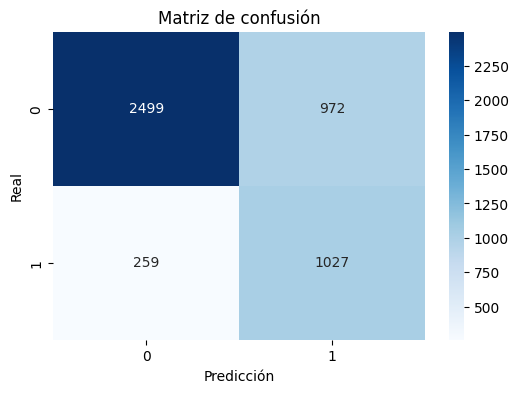

In [ ]:
# 2. Matriz de confusión
cm = confusion_matrix(y_train, y_train_pred)

# 3. Visualizar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

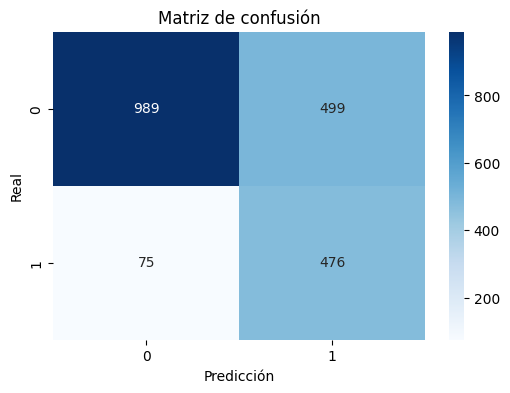

In [ ]:
# 2. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 3. Visualizar
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      3471
           1       0.51      0.80      0.63      1286

    accuracy                           0.74      4757
   macro avg       0.71      0.76      0.71      4757
weighted avg       0.80      0.74      0.75      4757



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.66      0.78      1488
           1       0.49      0.86      0.62       551

    accuracy                           0.72      2039
   macro avg       0.71      0.76      0.70      2039
weighted avg       0.81      0.72      0.73      2039



## 6.3 Visualización si las clases estuviesen balanceadas

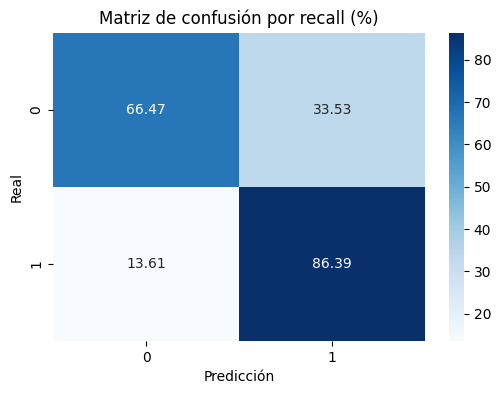

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = np.array([[989, 499],
               [75, 476]], dtype=float)

# Normalizar por filas (cada fila suma 1)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(6,4))
sns.heatmap(cm_norm * 100, annot=True, fmt=".2f", cmap='Blues')  # en %
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión por recall (%)')
plt.show()

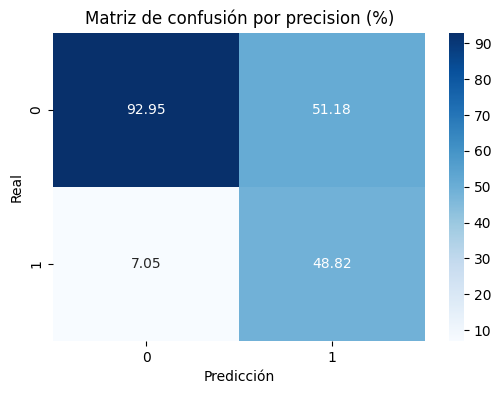

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cm = np.array([[989, 499],
               [75, 476]], dtype=float)

# Normalizar por filas (cada fila suma 1)
cm_norm = cm / cm.sum(axis=0, keepdims=True)

plt.figure(figsize=(6,4))
sns.heatmap(cm_norm * 100, annot=True, fmt=".2f", cmap='Blues')  # en %
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión por precision (%)')
plt.show()